In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier

In [2]:
df = pd.read_csv("churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


# Data Preprocessing

In [5]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
for col in df.columns.tolist():
    print("unique values of ",col)
    print(df[col].unique())
    print("-----------------",end='\n')

unique values of  customerID
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
-----------------
unique values of  gender
['Female' 'Male']
-----------------
unique values of  SeniorCitizen
[0 1]
-----------------
unique values of  Partner
['Yes' 'No']
-----------------
unique values of  Dependents
['No' 'Yes']
-----------------
unique values of  tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
-----------------
unique values of  PhoneService
['No' 'Yes']
-----------------
unique values of  MultipleLines
['No phone service' 'No' 'Yes']
-----------------
unique values of  InternetService
['DSL' 'Fiber optic' 'No']
-----------------
unique values of  OnlineSecurity
['No' 'Yes' 'No internet service']
-----------------
unique values of  OnlineBackup
['Yes' 'No' 'No internet se

In [7]:
obj_col = df.select_dtypes(include=['object'])

# Print the selected columns
cat_cols = obj_col.columns.tolist()
cat_cols

['customerID',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'TotalCharges',
 'Churn']

In [8]:
catog_cols = ['gender','Partner', 'Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection',
                 'TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod',
                     'Churn']
catog_cols

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [9]:
for col in catog_cols:
    print(col)
    
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

gender
Partner
Dependents
PhoneService
MultipleLines
InternetService
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
StreamingTV
StreamingMovies
Contract
PaperlessBilling
PaymentMethod
Churn


In [10]:
df.drop("customerID",axis =1,inplace = True)

In [11]:
# Convert TotalCharges to numerical
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].isna().sum()

11

In [12]:
# Calculate the mean of 'TotalCharges' after conversion
mean_total_charges = df['TotalCharges'].mean()

# Fill missing values with the mean in a non-chained, direct way
df['TotalCharges'] = df['TotalCharges'].fillna(mean_total_charges)
df['TotalCharges'].isna().sum()

0

In [13]:
df.duplicated().sum()

22

In [14]:
df = df.drop_duplicates()
df.duplicated().sum()

0

In [15]:
 #Categorize features into numerical or categorical
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
catagorical_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
              'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

In [16]:
#We first make a statistical summary of all the numerical features in our dataset
df[numerical_cols].describe()

,tenure,MonthlyCharges,TotalCharges
count,7021.000000,7021.000000,7021.000000
mean,32.469449,64.851894,2290.342338
std,24.534965,30.069001,2265.044153
min,0.000000,18.250000,18.800000
25%,9.000000,35.750000,411.150000
50%,29.000000,70.400000,1410.250000
75%,55.000000,89.900000,3801.700000
max,72.000000,118.750000,8684.800000


# Data Visualization

<AxesSubplot:ylabel='Churn'>

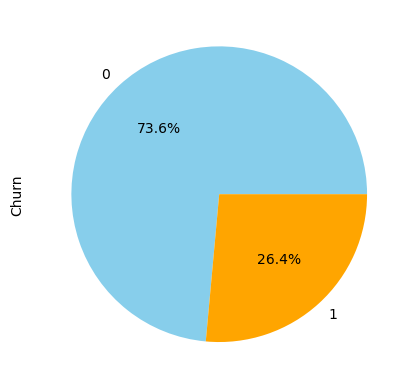

In [17]:
df['Churn'].value_counts().plot(kind = 'pie', autopct='%.1f%%', labels = df['Churn'].index, colors = ['skyblue','orange'])

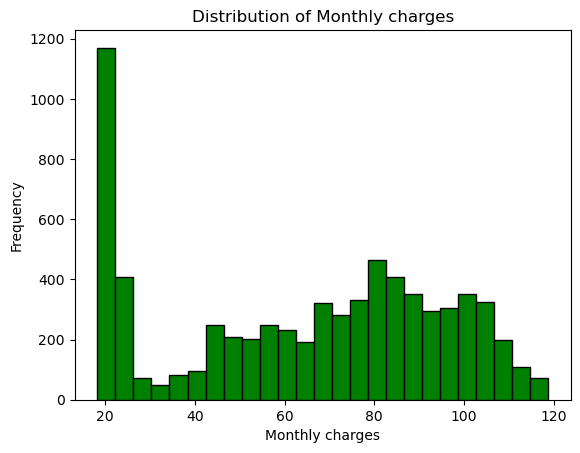

In [18]:
plt.hist(df['MonthlyCharges'],bins=25,color='green',edgecolor='black')
plt.xlabel('Monthly charges')
plt.ylabel('Frequency')
plt.title('Distribution of Monthly charges')
plt.show()

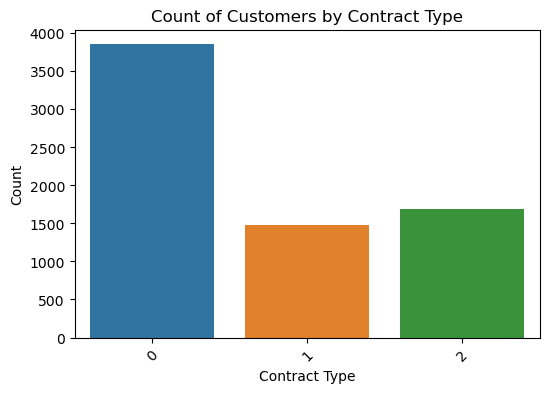

In [19]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Contract', data=df)
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.title('Count of Customers by Contract Type')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


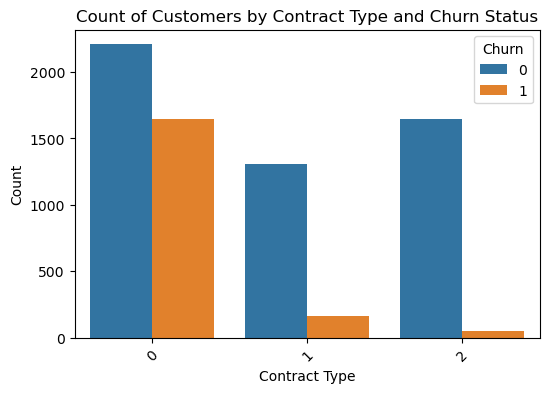

In [21]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Contract', hue='Churn', data=df)
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.title('Count of Customers by Contract Type and Churn Status')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Churn', loc='upper right')
plt.show()

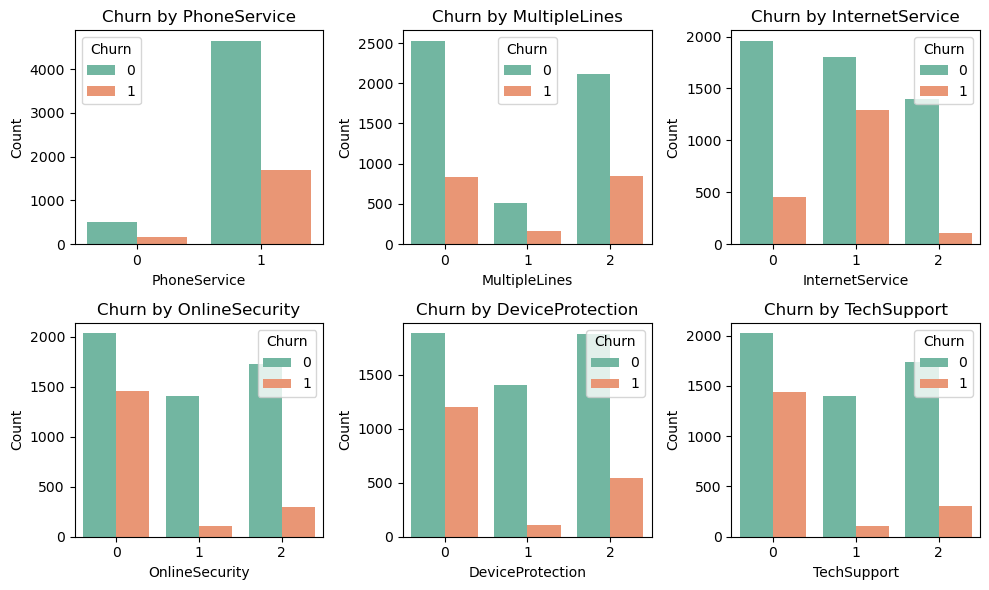

In [24]:
serv_cols = ['PhoneService', 'MultipleLines', 'InternetService','OnlineSecurity','DeviceProtection','TechSupport']
plt.figure(figsize = (10,6))
for i, col in enumerate(serv_cols, 1):
    plt.subplot(2,3,i)
    sns.countplot(x=col, hue = 'Churn', data = df, palette=sns.color_palette("Set2"))
    plt.title(f'Churn by {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

<AxesSubplot:>

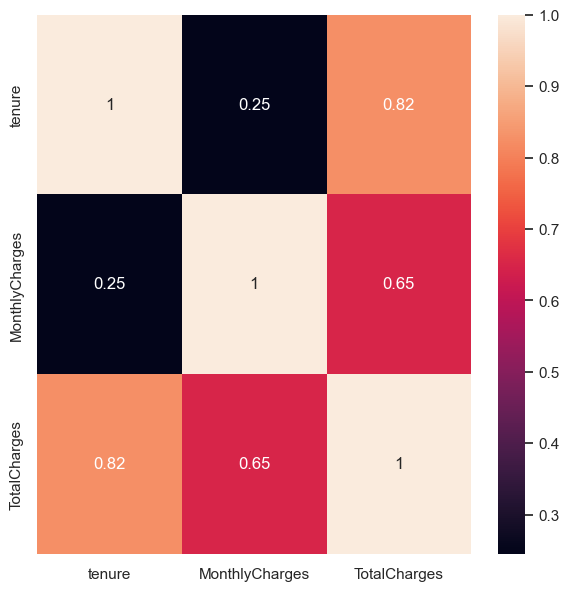

In [17]:
# Graphing the correlation between numerical features
plt.figure(figsize = (7,7))
sns.set(style = 'whitegrid')
sns.heatmap(df[numerical_cols].corr(), annot = True)

### we can notice that both the columns tenure and MonthlyCharges are highly correlated with the column TotalCharges

In [18]:
df.drop("MonthlyCharges",axis=1,inplace=True)
df.drop("tenure",axis=1,inplace=True)


In [27]:
c = ["TotalCharges"]

In [29]:
def handling_outliers(df, column):
    
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)#replace oytlier val with lower and upper value

In [30]:
for col in c:
    handling_outliers(df, col)


# Oversampling with SMOTE

Using SMOTE(Synthetic Minority Oversampling Technique) [2] for balancing the dataset. Resulted counts show that now we have exact number of class instances (1 and 0).

In [31]:
from sklearn.utils import resample

# Separate the minority and majority classes
target_column = 'Churn'

data_majority = df[df[target_column] == 0]
data_minority = df[df[target_column] == 1]
# Upsample minority class
data_minority_upsampled = resample(data_minority, replace=True,n_samples=len(data_majority),random_state=123) # reproducible results

# Combine majority class with upsampled minority class
data_upsampled = pd.concat([data_majority, data_minority_upsampled])

# Display new class counts
upsampled_class_counts = data_upsampled[target_column].value_counts()
upsampled_class_counts

0    5164
1    5164
Name: Churn, dtype: int64

In [32]:
data_upsampled.dropna(inplace=True)

In [33]:

df = data_upsampled

In [35]:
# splitting data to input and output
data_input = data_upsampled.drop(columns=[ 'Churn'])
data_output = data_upsampled['Churn']

In [36]:
x_train, x_test, y_train, y_test = train_test_split(data_input,data_output,test_size=0.33,random_state=24)

# Logistic Regression

In [37]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

# Initializing the Logistic Regression model
model = LogisticRegression()

# Training the model
model.fit(X_train_scaled, y_train)

# Making predictions
y_pred = model.predict(X_test_scaled)
# Evaluate accuracy
print("Accuracy:\n" ,accuracy_score(y_test, y_pred))


print("Classification Report for Logistic Regression: \n", classification_report(y_test, y_pred))

Accuracy:
 0.7512466999119977
Classification Report for Logistic Regression: 
               precision    recall  f1-score   support

           0       0.80      0.68      0.73      1724
           1       0.72      0.82      0.77      1685

    accuracy                           0.75      3409
   macro avg       0.76      0.75      0.75      3409
weighted avg       0.76      0.75      0.75      3409



# Rabdom Forest

In [38]:
rf_clf = RandomForestClassifier(n_estimators=100,max_depth=8,random_state=42,
                                verbose=1,class_weight="balanced")

rf_clf.fit(x_train,y_train)
y_pred = rf_clf.predict(x_test)
# Evaluate accuracy
print("Accuracy:\n" ,accuracy_score(y_test, y_pred))

print("Classification Report for Random Forest Classifier: \n", classification_report(y_test, y_pred))

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s


Accuracy:
 0.8143150484012907
Classification Report for Random Forest Classifier: 
               precision    recall  f1-score   support

           0       0.86      0.75      0.80      1724
           1       0.78      0.88      0.82      1685

    accuracy                           0.81      3409
   macro avg       0.82      0.82      0.81      3409
weighted avg       0.82      0.81      0.81      3409



[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


# XGBoost

In [43]:
# Train the XGBoost Model
xgboost_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgboost_model.fit(x_train, y_train)

# Make Predictions
y_pred = xgboost_model.predict(x_test)
# Evaluate accuracy
print("Accuracy:\n" ,accuracy_score(y_test, y_pred))

print("Classification Report for Xgboost: \n", classification_report(y_test, y_pred))

Accuracy:
 0.8589029040774421
Classification Report for Xgboost: 
               precision    recall  f1-score   support

           0       0.91      0.80      0.85      1724
           1       0.82      0.92      0.87      1685

    accuracy                           0.86      3409
   macro avg       0.86      0.86      0.86      3409
weighted avg       0.86      0.86      0.86      3409



# Decision Tree

In [45]:
# Train the Decision Tree Model
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(x_train, y_train)

# Make Predictions
y_pred = decision_tree_model.predict(x_test)
# Evaluate accuracy
print("Accuracy:\n" ,accuracy_score(y_test, y_pred))

print("Classification Report for Decision Tree: \n", classification_report(y_test, y_pred))

Accuracy:
 0.8671164564388384
Classification Report for Decision Tree: 
               precision    recall  f1-score   support

           0       0.93      0.80      0.86      1724
           1       0.82      0.93      0.87      1685

    accuracy                           0.87      3409
   macro avg       0.87      0.87      0.87      3409
weighted avg       0.87      0.87      0.87      3409



The decision Tree Classifier gives better results among all